In [1]:


from ucimlrepo import fetch_ucirepo  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
Y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

## Pre-Processing

In [2]:
Y['class'].unique()


array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [3]:
Y = ((Y['class'] == 'vgood') | (Y['class'] == 'good')).astype(float)
Y[Y == 0] = -1

In [4]:
Y = Y.values.reshape(-1,1)

In [5]:
Y

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [ 1.],
       [ 1.]], shape=(1728, 1))

In [6]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(1728, 1)
(1728, 6)
['med' 'low' '3' 'more' 'small' 'low' -1.0]


In [7]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [8]:
X['safety'].unique()
safeties = ['low', 'med', 'high']

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
enc = OrdinalEncoder(categories = [safeties])

In [11]:
enc.fit_transform(X[['safety']])

array([[0.],
       [1.],
       [2.],
       ...,
       [0.],
       [1.],
       [2.]], shape=(1728, 1))

In [12]:
X['safety'] = enc.fit_transform(X[['safety']])

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/2467625863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['safety'] = enc.fit_transform(X[['safety']])


In [13]:
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,0.0
1,vhigh,vhigh,2,2,small,1.0
2,vhigh,vhigh,2,2,small,2.0
3,vhigh,vhigh,2,2,med,0.0
4,vhigh,vhigh,2,2,med,1.0
5,vhigh,vhigh,2,2,med,2.0
6,vhigh,vhigh,2,2,big,0.0
7,vhigh,vhigh,2,2,big,1.0
8,vhigh,vhigh,2,2,big,2.0
9,vhigh,vhigh,2,4,small,0.0


In [14]:
X['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['vhigh', 'high', 'med', 'low']])

In [16]:
X['buying'] = enc.fit_transform(X[['buying']])

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/3254741427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['buying'] = enc.fit_transform(X[['buying']])


In [17]:
X['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['vhigh', 'high', 'med', 'low']])
X['maint'] = enc.fit_transform(X[['maint']])

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/1184173215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['maint'] = enc.fit_transform(X[['maint']])


In [19]:
X['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['small', 'med', 'big']])
X['lug_boot'] = enc.fit_transform(X[['lug_boot']])

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/3565642384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lug_boot'] = enc.fit_transform(X[['lug_boot']])


In [21]:
X['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [22]:
X['doors'].unique()
X['doors'] = X['doors'].replace({'5more': '5'}).astype(float)

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/3427434600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['doors'] = X['doors'].replace({'5more': '5'}).astype(float)


In [23]:
X

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2.0,2,0.0,0.0
1,0.0,0.0,2.0,2,0.0,1.0
2,0.0,0.0,2.0,2,0.0,2.0
3,0.0,0.0,2.0,2,1.0,0.0
4,0.0,0.0,2.0,2,1.0,1.0
...,...,...,...,...,...,...
1723,3.0,3.0,5.0,more,1.0,1.0
1724,3.0,3.0,5.0,more,1.0,2.0
1725,3.0,3.0,5.0,more,2.0,0.0
1726,3.0,3.0,5.0,more,2.0,1.0


In [24]:
X['persons'] = X['persons'].replace({'more' : '6'}).astype(float)

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_73448/2229829046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['persons'] = X['persons'].replace({'more' : '6'}).astype(float)


In [25]:
print(Y.shape)
print(X.shape)

(1728, 1)
(1728, 6)


## Implementing Decision Tree Classifier

In [26]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'max_depth': [1, 2, 3, 4, 5]}
estimator = tree.DecisionTreeClassifier(criterion='entropy')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)

# Get best hyperparameters
best_params = grid_search.best_params_

In [30]:
best_params

{'max_depth': 1}

In [28]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd 
#import seaborn as sns

partitions = [0.2, 0.5, 0.8]

# new list code 
train_accuracies = []
test_accuracies = []


for partition in partitions:

    # new code to remember errors
    partition_train_acc = []
    partition_test_acc = []

    for trial in range(3):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=partition)

        best_model = DecisionTreeClassifier(criterion='entropy', **best_params, random_state=None)
        # random state = None ensures a random data split within the partitions 

        # Fit the model
        best_model.fit(X_train, Y_train)
        
        # Calculate accuracies
        train_acc = best_model.score(X_train, Y_train)
        test_acc = best_model.score(X_test, Y_test)

        # new code to remember the errors 
        partition_train_acc.append(train_acc)
        partition_test_acc.append(test_acc)

        y_pred = best_model.predict(X_test)

        # Print classification report for predictions
        print(classification_report(Y_test, y_pred))
        
        # Print results for this trial directly
        print(f"Partition: {partition*100:.0f}/100, Trial: {trial+1}")
        print(f"Train Accuracy: {train_acc:.4f}")
        # print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")

    # new code to remember errors
    avg_train_acc = np.mean(partition_train_acc)
    avg_test_acc = np.mean(partition_test_acc)

    # Store average accuracies for this partition
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)


results_df = pd.DataFrame({
    'Partition': [f"{partition*100:.0f}/100" for partition in partitions],
    'Average Train Accuracy': train_accuracies,
    'Average Test Accuracy': test_accuracies,
})

print("\nAverage Accuracies:")
print(results_df)
    
# verify if i need to d ogrid search before 
# find best hyperparameter and then run the trials 
# cross validation is used to find best parameters
    

              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96      1274
         1.0       0.00      0.00      0.00       109

    accuracy                           0.92      1383
   macro avg       0.46      0.50      0.48      1383
weighted avg       0.85      0.92      0.88      1383

Partition: 20/100, Trial: 1
Train Accuracy: 0.9275
Test Accuracy: 0.9212
              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96      1279
         1.0       0.00      0.00      0.00       104

    accuracy                           0.92      1383
   macro avg       0.46      0.50      0.48      1383
weighted avg       0.86      0.92      0.89      1383

Partition: 20/100, Trial: 2
Train Accuracy: 0.9130
Test Accuracy: 0.9248
              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96      1271
         1.0       0.00      0.00      0.00       112

    accuracy                        

/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

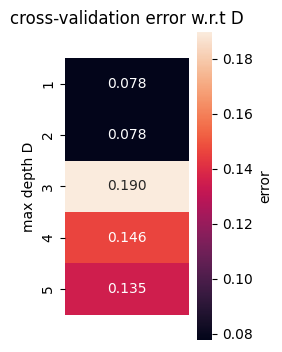

In [29]:
import seaborn as sns

D_list = [1, 2, 3, 4, 5]

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()


cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

## 